# Microsoft Movie Analysis

## Overview

Microsoft wants to go into the film business but they lack experience in that area. To find out which movies they should make, we performed analysis on the IMDB database as well as data from the Box Office Mojo to come up with actionable insights using information such as ratings, number of votes as well as the domestic and foreign gross that can guide Microsoft to make an informed decision. The data showed that movie combinations of Action,Adventure,Sci-Fi and Adventure,Animation,Comedy do very well in both domestic and foreign markets. Action,Adenture,Sci-Fi movie combinations along with Action,Thriller and Adventure,Drama,Sci-Fi moves have the highest number of votes. Movies with a runtime of between 70-120 minutes recieved the highest ratings.

Recommendations are for Microsoft to make movies with a combination of Action,Adventure,Sci-Fi or Adventure,Animation,Comedy. Microsoft can create sequels to the movies: Inception, The Dark Knight Rises and Interstellar. They should also make movies with a runtime of between 70-120 minutes long. Movies incooperated with adventure tend to do well in the box office as well as with viewers.

## Business Problem
Microsoft is going into the film business with the intention of building a profitable film studio. However, because they lack film making expertise, they want to know what kinds of movies are doing well at the box office right now. To do this, we need to look at which genres are performing well at the box office in terms of income generation, the preferences of the audience in respect to various genres.

The answers to these questions are crucial since they will assist Microsoft in prioritizing which movies to make. Doing so will allow them to produce content that not only engages viewers but also boosts box office earnings.

## Data Understanding
The data used for this project comes from IMDB (Internet Movie Database) which contains information about movies, ratings and industry members. Data was also used from the Box Office Mojo which provides information about the financial performance of movies, including box office revenue and other financial metrics.

In [541]:
#Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

plt.style.use('seaborn')

%matplotlib inline

In [542]:
#Reading the datasets from the various locations
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
conn = sqlite3.connect('im.db') #im.db is a database
#Getting the movie_basics table from the imdb database
imdb_movie_basics = pd.read_sql("SELECT * from movie_basics;",conn)
#Getting the movie_ratings table from the imdb database
imdb_movie_ratings = pd.read_sql("SELECT * from movie_ratings;",conn)
conn.close()

In [543]:
#Viewing the first 5 rows of the bom_movies_gross dataframe
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [544]:
#Checking the summary of the bom_movie_gross dataframe
#Table has 5 columns and 3387 rows
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [545]:
#Viewing the movie_basics dataframe
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [546]:
#Checking the summary of the dataframe
#It contains 6 columns and 146144 rows
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [547]:
#Viewing the movie_ratings dataframe
imdb_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [548]:
#Checking the summary of the movie_ratings dataframe
#It contains 3 columns and 73856 rows
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Data Preparation
In order to prepare the data for analysis, we need to join the imdb_movie_basics and the imdb_movie_ratings data tables. We join them using the movie_id column that is common to both, and perform an inner join to get only the rows that match between the two tables.

Once the join is performed, we join the bom_movie_gross table with the resulting table from the above to create the bom_imdb dataframe that contains information from both the IMDB data and the Box Office Mojo data. The resulting dataframe has both information about movies as well as their performance in the box office.

In [549]:
#Joining the imdb data tables
imdb_movie_basics.set_index('movie_id',inplace=True)
imdb_movie_ratings.set_index('movie_id',inplace=True)
imdb_movie_basic_ratings = imdb_movie_basics.join(imdb_movie_ratings,how='inner')
imdb_movie_basic_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [550]:
#Joining the merged imdb tables with the bom_movie_gross table
bom_movie_gross.set_index('title',inplace=True)
imdb_movie_basic_ratings.set_index('primary_title',inplace=True)
bom_imdb = bom_movie_gross.join(imdb_movie_basic_ratings,how='inner')
bom_imdb.head()

,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103
"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
10 Years,Anch.,203000.0,NaN,2012,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484
1001 Grams,KL,11000.0,NaN,2015,1001 Gram,2014,93.0,Drama,6.3,1301


In [551]:
#Reseting the index of the bom_imdb dataframe
bom_imdb = bom_imdb.reset_index()
bom_imdb = bom_imdb.rename(columns={'index':'primary_title'})
bom_imdb.head()

,primary_title,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103
1,"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848
2,10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
3,10 Years,Anch.,203000.0,NaN,2012,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484
4,1001 Grams,KL,11000.0,NaN,2015,1001 Gram,2014,93.0,Drama,6.3,1301


### Data Cleaning
In this section, the dataframe was checked for null values. Since null values in the foreign_gross column were almost half the total values in the column, the values were filled with the median since it has a reduced impact on analysis, and is least sensitive to outliers. Any resulting null values in the dataframe were deleted. We also checked for duplicate values that were not present.

Since the foreign_gross column is represented as a string, it was converted to a float value as well as the numvotes column which is an int to a column representing float values. The domestic_gross and foreign_gross columns were renamed to domestic_gross_in_million_$ and foreign_gross_in_million_$ in order to represent those columns better.

Lastly, the studio, domestic_gross, foreign_gross, original_title, year, start_year were dropped since they are not important to the analysis and since the domestic_gross and foreign_gross columns are duplicates of the columns changed above.

In [552]:
#The resulting dataframe contains 11 columns and 3027 rows
bom_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   original_title   3027 non-null   object 
 6   start_year       3027 non-null   int64  
 7   runtime_minutes  2980 non-null   float64
 8   genres           3020 non-null   object 
 9   averagerating    3027 non-null   float64
 10  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 260.3+ KB


In [553]:
#Checking missing or null values
bom_imdb.isnull().sum()

primary_title         0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
dtype: int64

In [554]:
#Checking duplicate values
bom_imdb.duplicated().sum()

0

In [555]:
#Since missing values in foreign_gross are almost more than half we replace with median
#Change the column to float
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].str.replace(',', '').astype(float)
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].fillna(bom_imdb['foreign_gross'].median())

In [556]:
bom_imdb.isnull().sum()

primary_title       0
studio              3
domestic_gross     22
foreign_gross       0
year                0
original_title      0
start_year          0
runtime_minutes    47
genres              7
averagerating       0
numvotes            0
dtype: int64

In [557]:
#Drop all the rows that still contain null values
bom_imdb.dropna(axis=0, inplace =True)

In [558]:
bom_imdb.isnull().sum()

primary_title      0
studio             0
domestic_gross     0
foreign_gross      0
year               0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [559]:
bom_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    2952 non-null   object 
 1   studio           2952 non-null   object 
 2   domestic_gross   2952 non-null   float64
 3   foreign_gross    2952 non-null   float64
 4   year             2952 non-null   int64  
 5   original_title   2952 non-null   object 
 6   start_year       2952 non-null   int64  
 7   runtime_minutes  2952 non-null   float64
 8   genres           2952 non-null   object 
 9   averagerating    2952 non-null   float64
 10  numvotes         2952 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 276.8+ KB


In [560]:
#Renaming the domestic_gross and foreign_gross columns
#Changed the datatype of the numvotes column
bom_imdb['domestic_gross_in_million_$'] = bom_imdb['domestic_gross'] / 1e6
bom_imdb['foreign_gross_in_million_$'] = bom_imdb['foreign_gross'] / 1e6
bom_imdb['numvotes_thosands'] = bom_imdb['numvotes'] / 1e3
bom_imdb['numvotes'] = bom_imdb['numvotes'].astype(float) 

In [561]:
bom_imdb.drop(labels=['studio','domestic_gross','foreign_gross','original_title','year','start_year','numvotes'], axis=1, inplace=True)
bom_imdb.head()

,primary_title,runtime_minutes,genres,averagerating,domestic_gross_in_million_$,foreign_gross_in_million_$,numvotes_thosands
0,'71,99.0,"Action,Drama,Thriller",7.2,1.3000,0.355,46.103
1,"1,000 Times Good Night",117.0,"Drama,War",7.1,0.0539,21.200,6.848
2,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,72.1000,38.100,260.383
3,10 Years,100.0,"Comedy,Drama,Romance",6.1,0.2030,21.200,22.484
4,1001 Grams,93.0,Drama,6.3,0.0110,21.200,1.301


In [562]:
bom_imdb.describe()

,runtime_minutes,averagerating,domestic_gross_in_million_$,foreign_gross_in_million_$,numvotes_thosands
count,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,107.305894,6.464837,30.680274,56.154408,63.190740
std,20.043335,0.994953,67.089697,112.295519,126.736972
min,3.000000,1.600000,0.000100,0.000600,0.005000
25%,94.000000,5.900000,0.136750,14.050000,2.500500
50%,105.000000,6.600000,2.000000,21.200000,13.877500
75%,118.000000,7.100000,32.425000,34.450000,66.669500
max,272.000000,9.200000,700.100000,946.400000,1841.066000


## Data Analysis
To perform data analysis, we performed EDA (Exploratory Data Analysis) allowing us to look at different variables at a time and present them in visualizations. This will guide us on what recommendations and conclusions to make for the company.

In [563]:
#Get the categorical and numerical columns from the dataframe
cat_cols= bom_imdb.select_dtypes(include=['object']).columns
num_cols = bom_imdb.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['primary_title', 'genres'], dtype='object')
Numerical Variables:
['runtime_minutes', 'averagerating', 'domestic_gross_in_million_$', 'foreign_gross_in_million_$', 'numvotes_thosands']


runtime_minutes
Skew : 0.64


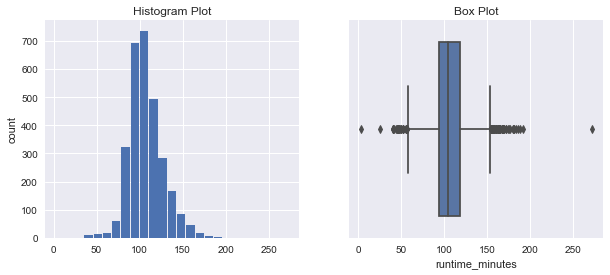

averagerating
Skew : -0.83


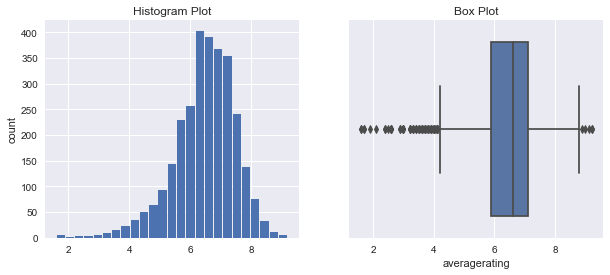

domestic_gross_in_million_$
Skew : 4.15


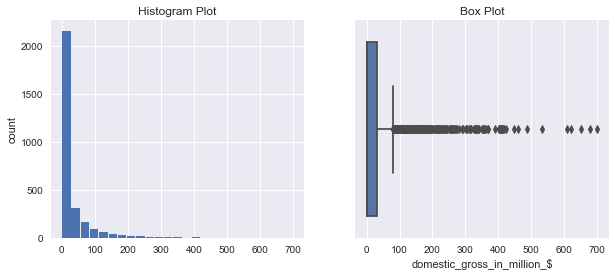

foreign_gross_in_million_$
Skew : 4.04


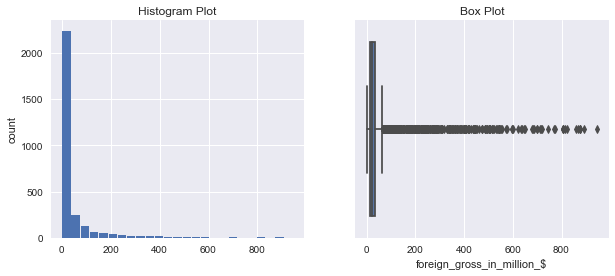

numvotes_thosands
Skew : 4.44


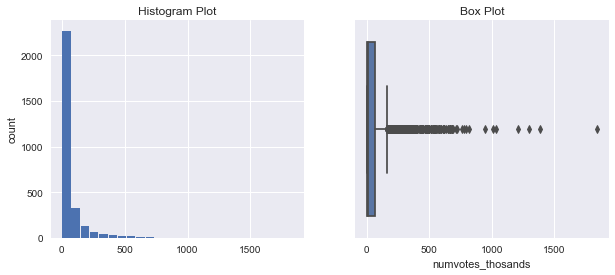

In [564]:
#Plotting the numerical columns
for col in num_cols:
    print(col)
    print('Skew :', round(bom_imdb[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    plt.title('Histogram Plot')
    bom_imdb[col].hist(grid=True,bins=25,rwidth=0.9)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=bom_imdb[col])
    plt.title('Box Plot')
    plt.show()
    

  

The above plots allow us to look at the data from the numerical columns. The results:
- Majority of the movies have a runtime of about 80-120 minutes with outliers of movies below 50 minutes and above 150 minutes.
- Majority of the ratings are between 6-8 with outliers below 4 and some above 8. The max rating is 9.2.
- Majority of the votes are between 0-200000 votes.
- Majority he domestic gross is between 0-50 million with outliers above 80 million.
- For the foreign gross, majority of the values are between 0 to about 30million with outliers above 100 million.

In [565]:
#Groups the dataframe by genres and counts that value of every column that contains that genre
bom_imdb['genres'].value_counts()

Drama                       301
Comedy,Drama                132
Comedy,Drama,Romance        132
Drama,Romance               111
Documentary                 104
                           ... 
Comedy,Horror,Romance         1
Comedy,Crime,Horror           1
Adventure,Comedy,Romance      1
Adventure,Comedy,Horror       1
Documentary,History,News      1
Name: genres, Length: 317, dtype: int64

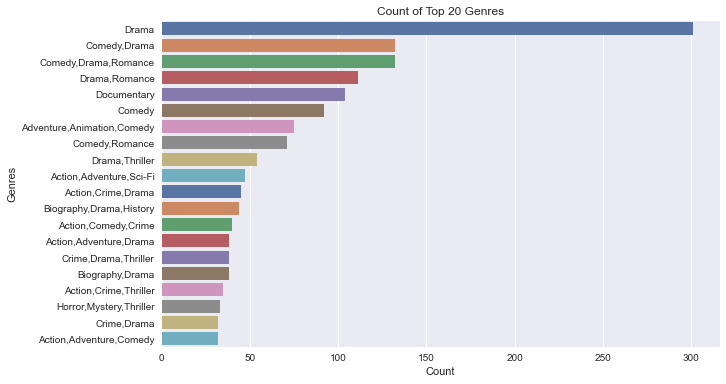

In [566]:
#Count plot for the top 20 genres
top_genres = bom_imdb['genres'].value_counts().head(20)

plt.figure(figsize=(10, 6))
plt.title('Count of Top 20 Genres')
sns.countplot(y='genres', data=bom_imdb, order=top_genres.index,palette='deep')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [567]:
#Compare the total_domestic gross across each genre and the total_foreign gross across each genre
def compare_gross_by_genre(data, domestic_column, foreign_column):
    total_domestic_gross = data.groupby('genres')[domestic_column].sum().sort_values(ascending=False).head(20)
    total_foreign_gross = data.groupby('genres')[foreign_column].sum().sort_values(ascending=False).head(20)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    sns.barplot(x=total_domestic_gross.index, y=total_domestic_gross.values, palette='viridis')
    plt.xlabel('Genres')
    plt.ylabel('Total Domestic Gross Revenue (Millions)')
    plt.title('Total Domestic Gross Revenue by Genre')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    sns.barplot(x=total_foreign_gross.index, y=total_foreign_gross.values, palette='viridis')
    plt.xlabel('Genres')
    plt.ylabel('Total Foreign Gross Revenue (Millions)')
    plt.title('Total Foreign Gross Revenue by Genre')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()



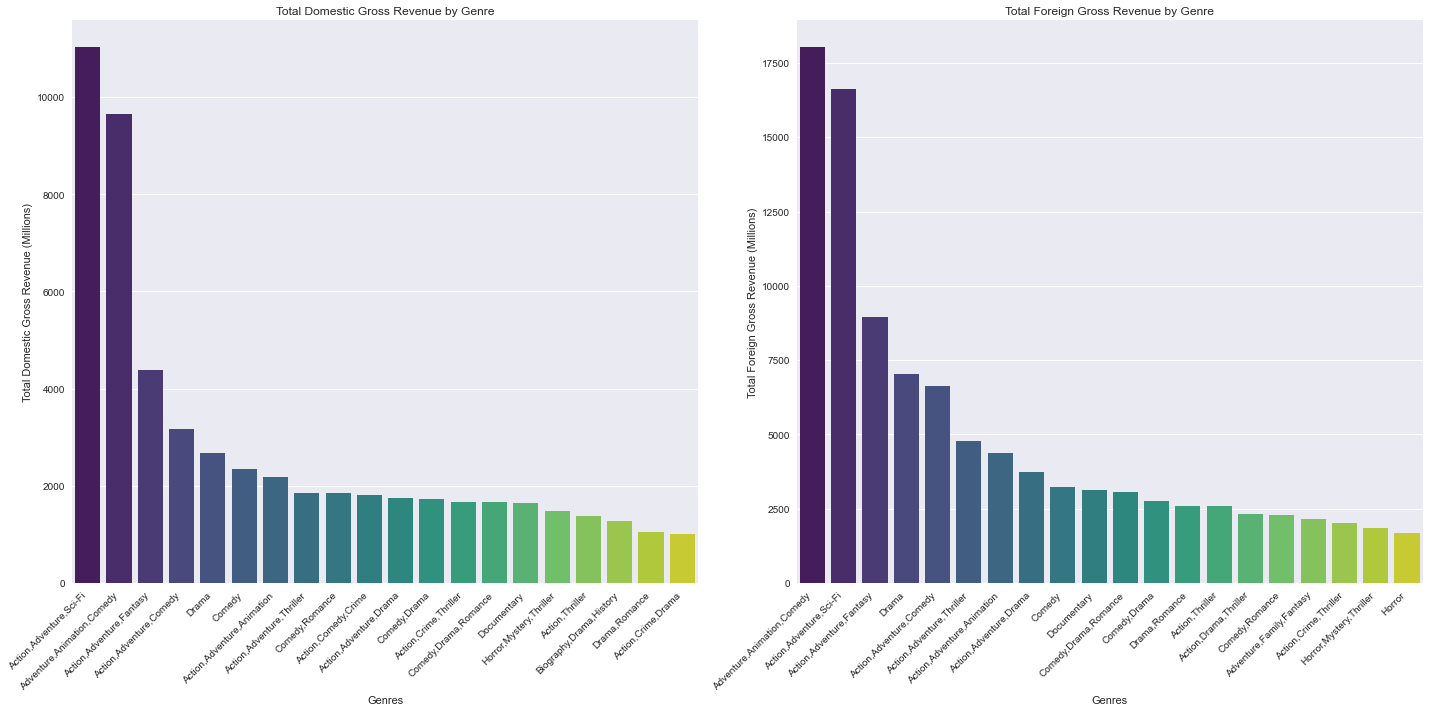

In [568]:
compare_gross_by_genre(bom_imdb, 'domestic_gross_in_million_$', 'foreign_gross_in_million_$')

In the above plots the film that have the highest total domestic gross revenue in millions are:
- Action, Adventure, Sci-Fi films with about 11000 million in total gross domestic revenue
- Adventure, Animation, Comedy films about 9000 million in total gross domestic revenue

The genres that have the highest total foreign gross revenue in millions are:
- Adventure, Animation, Comedy films with about 19000 in total gross foreign revenue
- Action, Adenture, Sci-Fi movies have a total gross of about 16000 in total foreign gross revenue.

In [569]:
#Compare the total gross - domestic + total across each genre
bom_imdb['total_gross_million_$'] = bom_imdb['domestic_gross_in_million_$'] + bom_imdb['foreign_gross_in_million_$']
total_gross = bom_imdb.groupby('genres')['total_gross_million_$'].sum().sort_values(ascending=False).head(20)
total_gross

genres
Adventure,Animation,Comedy    27670.932597
Action,Adventure,Sci-Fi       27657.302388
Action,Adventure,Fantasy      13314.887000
Action,Adventure,Comedy        9815.072299
Drama                          9713.849496
Action,Adventure,Thriller      6621.298000
Action,Adventure,Animation     6560.160400
Comedy                         5590.830199
Action,Adventure,Drama         5508.104799
Documentary                    4765.248398
Comedy,Drama,Romance           4754.666298
Comedy,Drama                   4493.528800
Comedy,Romance                 4137.462099
Action,Thriller                3969.048399
Action,Crime,Thriller          3683.154173
Drama,Romance                  3641.316499
Action,Comedy,Crime            3425.341900
Horror,Mystery,Thriller        3348.427600
Adventure,Family,Fantasy       3079.900000
Biography,Drama,History        2859.559399
Name: total_gross_million_$, dtype: float64

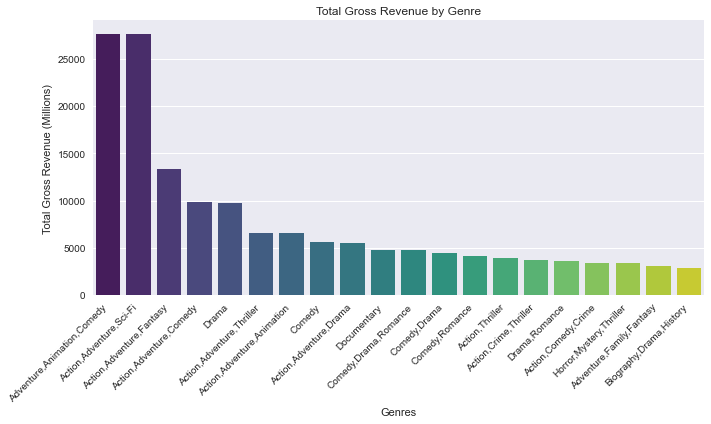

In [570]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_gross.index, y=total_gross.values,palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Total Gross Revenue (Millions)')
plt.title('Total Gross Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

For the above plot, we added both the domestic and foreign gross to look at the total gross of each film. Similarly, movies with the genre Adventure, Animation, Comedy as well as Action, Adventure, Sci-Fi have the highest total gross (domestic + foreign) with about 27000 million.

In [571]:
#Compare number of votes vs movie genres
top_20_movies_votes = bom_imdb.nlargest(20,'numvotes_thosands')

In [572]:
#Compare runtime minutes to ratings
top_20_movies_rating = bom_imdb.nlargest(20,'averagerating')

In [573]:
def compare_movies_by_genre(data, x_column, y_column, hue_column, plot_type='bar', dodge=False):
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'bar':
        sns.barplot(data=data, x=x_column, y=y_column, hue=hue_column, palette='deep', dodge=dodge)
    elif plot_type == 'scatter':
        sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column, palette='deep')
    
    plt.xlabel(x_column.replace('_', ' ').capitalize())
    plt.ylabel(y_column.replace('_', ' ').capitalize())
    plt.title(f'{x_column.replace("_", " ").capitalize()} vs {y_column.replace("_", " ").capitalize()}')
    plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


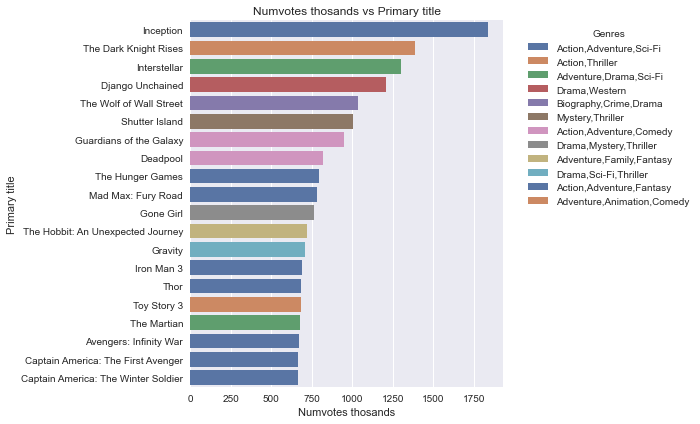

In [574]:
compare_movies_by_genre(top_20_movies_votes, 'numvotes_thosands', 'primary_title', 'genres', plot_type='bar', dodge=False)

In the above plot, the film that has the most number of votes belong to the Action,Adventure,Sci-Fi genre with about 1.8 million votes is Inception, followed by The Dark Knight Rises which belongs to the Action,Thriller genre with about 1.3 million votes and third is Interstellar which belongs to the Adventure,Drama,Sci-Fi genre with about 1.25 million votes

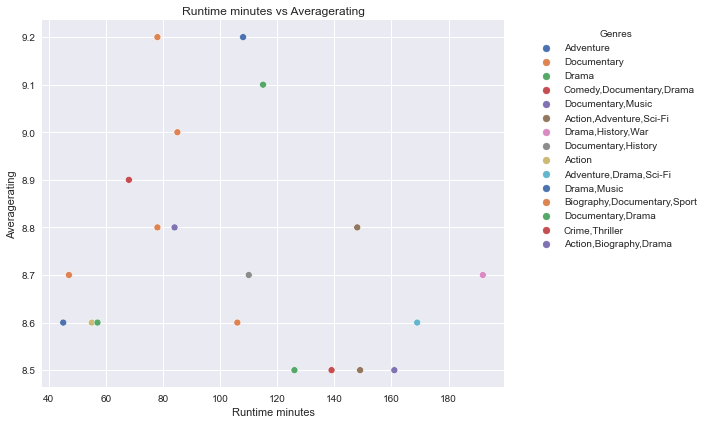

In [575]:
compare_movies_by_genre(top_20_movies_rating, 'runtime_minutes', 'averagerating', 'genres', plot_type='scatter')

In the above, films that have runtime minutes of between 70-120 have the highest average rating. These high rated films are in the adventure, documentary, drama and comedy,documentary,drama.

## Conclusions
This analysis yields the following recommedations for Microsoft:

- The movie combinations of Action,Adventure,Sci-Fi and Adventure,Animation,Comedy do very well in both domestic and foreign markets. These film combinations also have high total gross revenues that is domestic plus foreign revenues. Microsoft can consider making movies with the above combinations. 

- Action,Adenture,Sci-Fi movie combinations along with Action,Thriller and Adventure,Drama,Sci-Fi moves have the highest number of votes. The films coupled with these genres: Inception, The Dark Knight Rises and Interstellar can serve as good points to borrow ideas on what movies to make. Additionally, Microsoft can consider making sequels to these movies as a start.

- Microsoft should make movies with a runtime of between 70 and 120 minutes as these types of movies recieved the highest ratings. Additionally, the genres that recieved the highest rating had a watch time of the above and were the following genres: Adventure, Documentary, Drama.

- Any movies incooperated with adventure tend to do well in the box office as well as with viewers.


### Next Steps
In order to produce a more robust analysis and further insights additional datasets may be added in order to look into other factors that may influence the domestic and foreign gross. This can be information about specific actors or directors that influence viewers to watch a particular movie.